In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import time
import os,jpype
import json_lines
from tqdm import tqdm
import seaborn as sns
import Levenshtein
import random

In [ ]:
data_path="../PreprocessedDataSet/"

In [2]:
trainset_0=pd.read_csv(data_path+"java_code_trainset_0_count.csv")  
total_trainset=pd.DataFrame(columns=list(trainset_0.columns))
for x in range(0,16,1):
    c_trainset=pd.read_csv(data_path+"java_code_trainset_"+str(x)+"_count.csv")  
    total_trainset=pd.concat([total_trainset, c_trainset], ignore_index=True) 

In [8]:
total_trainset=total_trainset.drop(['Unnamed: 0'], axis=1)
total_trainset["Complexity"] = total_trainset["Complexity"].astype(int)
total_trainset["LineNumber"] = total_trainset["LineNumber"].astype(int)
total_trainset["Methodlength"] = total_trainset["Methodlength"].astype(int)
total_trainset["LLratio"] = total_trainset["LLratio"].astype(float)
total_trainset["StringPercentage"] = total_trainset["StringPercentage"].astype(float)
total_trainset.head()

Original  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(\n\t\t...   
2  public void addServletRegistrationBeans(\n\t\t...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                              Parsed  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                               Fixed  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                               Train  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                           Train-OPT  Complexity  LineNumber  \
0  protected final void bindIndexed(Configuration...           4           8   
1  public void setServletRegistrationBeans(Collec...           1           4   
2  public void addServletRegistrationBeans(Servle...           1           4   
3  public void setServletNames(Collection<String>...           1           4   
4  public void addServletNames(String... servletN...           1           4   

   Methodlength  LLratio  StringPercentage  \
0           479   59.875          0.000000   
1           292   73.000          0.140411   
2           272   68.000          0.150735   
3           190   47.500          0.152632   
4           183   45.750          0.158470   

                                               Input  \
0  protected final void bindIndexed(Configuration...   
1  public void setServletRegistrationBeans(Collec...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   
4  public void addServletNames(String... servletN...   

                                              Output  
0    for (  ConfigurationPropertySource source : ...  
1    this.servletRegistrationBeans=new LinkedHash...  
2    Collections.addAll(this.servletRegistrationB...  
3    this.servletNames=new LinkedHashSet<>(servle...  
4    this.servletNames.addAll(Arrays.asList(servl...

# All standards have tried in this project

# V1 

lines Number <=20<br>
length <=1500<br>

# V2 

lines Number <=27<br>
ratio <=68<br>
complexity <=7<br>
length <=1117<br>

# V3 

com <=11<br>
lineNumber<=40<br>
methodLength<=1665<br>
ratio<=80<br>
StringPercentage<=0.1622950819672131<br>

# V4 

com <=11<br>
lineNumber<=40<br>
methodLength<=1130<br>
ratio<=68<br>
StringPercentage<=0.1622950819672131<br>

#  Data Cleaning

In [1]:
standard_complexity=11
standard_lineNumber=40
standard_methodlength=1130
standard_ratio=68
standard_sp=0.1622950819672131

In [78]:
total_trainset_m=total_trainset_p
total_trainset_m=total_trainset_m[total_trainset_m["Complexity"]<=standard_complexity]
total_trainset_m=total_trainset_m[total_trainset_m["LineNumber"]<=standard_lineNumber]
total_trainset_m=total_trainset_m[total_trainset_m["Methodlength"]<=standard_methodlength]
total_trainset_m=total_trainset_m[total_trainset_m["LLratio"]<=standard_ratio]
total_trainset_m=total_trainset_m[total_trainset_m["StringPercentage"]<=standard_sp]
print(len(total_trainset_m))
total_trainset_m.head(3)

351374


Original  \
0  protected final void bindIndexed(Configuration...   
2  public void addServletRegistrationBeans(\n\t\t...   
3  public void setServletNames(Collection<String>...   

                                              Parsed  \
0  protected final void bindIndexed(Configuration...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   

                                               Fixed  \
0  protected final void bindIndexed(Configuration...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   

                                               Train  \
0  protected final void bindIndexed(Configuration...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   

                                           Train-OPT  Complexity  LineNumber  \
0  protected final void bindIndexed(Configuration...           4           8   
2  public void addServletRegistrationBeans(Servle...           1           4   
3  public void setServletNames(Collection<String>...           1           4   

   Methodlength  LLratio  StringPercentage  \
0           479   59.875          0.000000   
2           272   68.000          0.150735   
3           190   47.500          0.152632   

                                               Input  \
0  protected final void bindIndexed(Configuration...   
2  public void addServletRegistrationBeans(Servle...   
3  public void setServletNames(Collection<String>...   

                                              Output  
0    for (  ConfigurationPropertySource source : ...  
2    Collections.addAll(this.servletRegistrationB...  
3    this.servletNames=new LinkedHashSet<>(servle...

In [79]:
print(len(total_trainset_m))

351374


In [81]:
round(len(total_trainset_m)/len(total_trainset),4)

0.7732

In [82]:
total_trainset_m.describe()

Complexity     LineNumber   Methodlength        LLratio  \
count  351374.000000  351374.000000  351374.000000  351374.000000   
mean        2.565796       9.911439     376.306969      40.570416   
std         1.858027       6.460312     232.259186      11.426393   
min         1.000000       2.000000      66.000000      10.242424   
25%         1.000000       5.000000     197.000000      31.666667   
50%         2.000000       8.000000     300.000000      39.250000   
75%         3.000000      13.000000     495.000000      48.583333   
max        11.000000      40.000000    1130.000000      68.000000   

       StringPercentage  
count     351374.000000  
mean           0.020574  
std            0.039774  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            0.019802  
max            0.162295

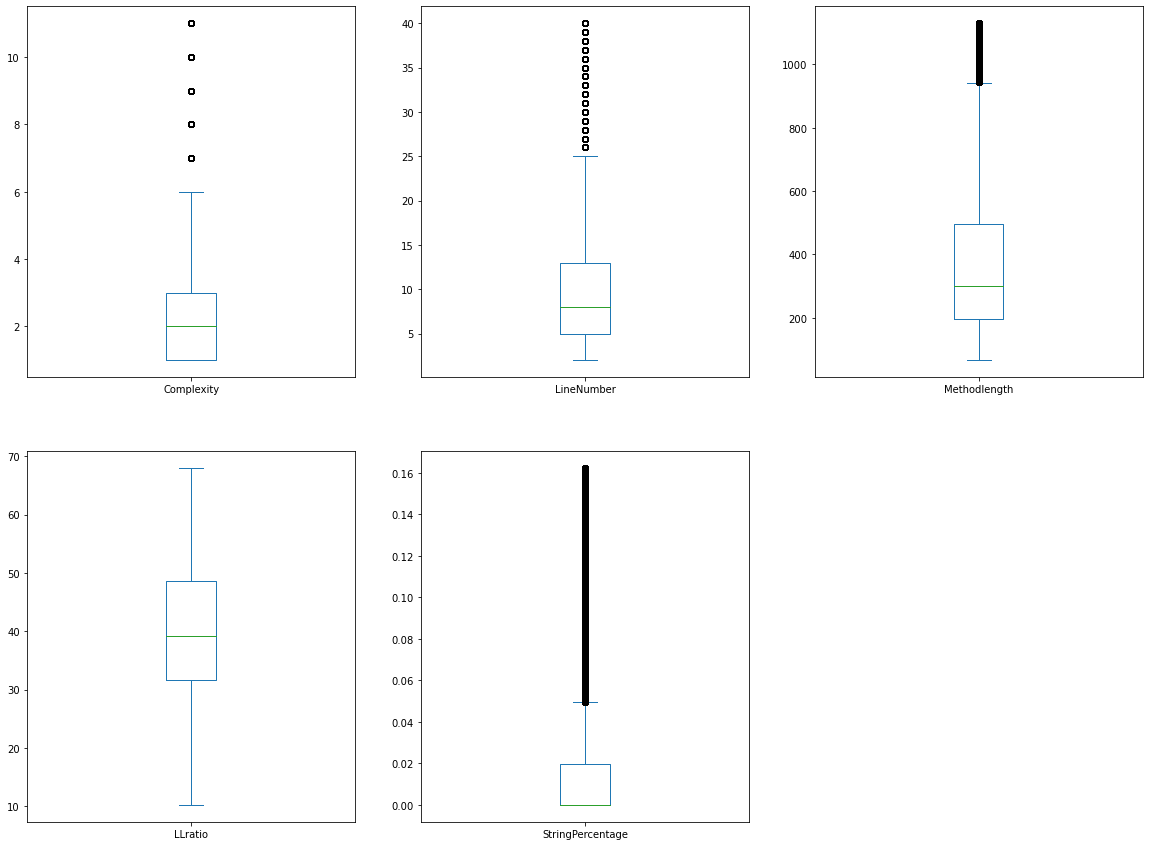

In [83]:
total_trainset_m.plot(kind='box',figsize=(20,15), subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

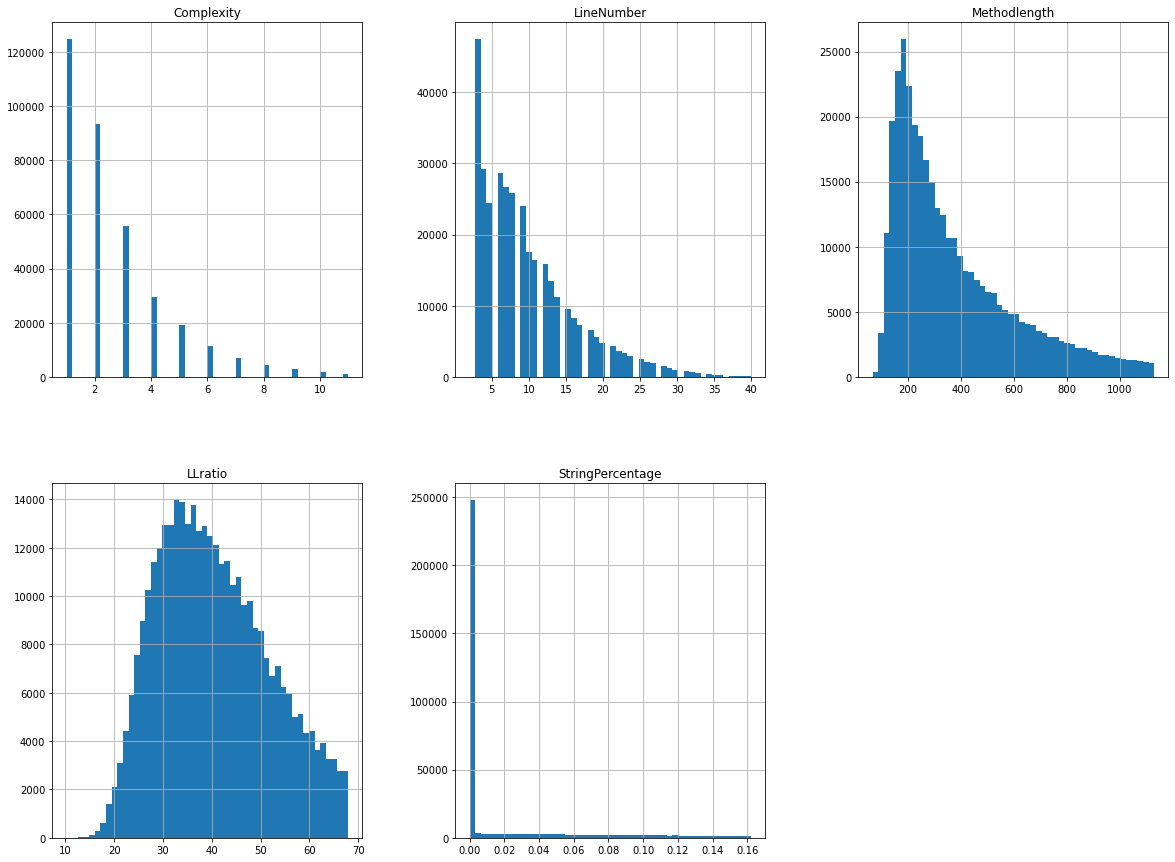

In [84]:
total_trainset_m.hist(bins=50,figsize=(20,15),layout=(2,3))
plt.show()

# test and valid dataset

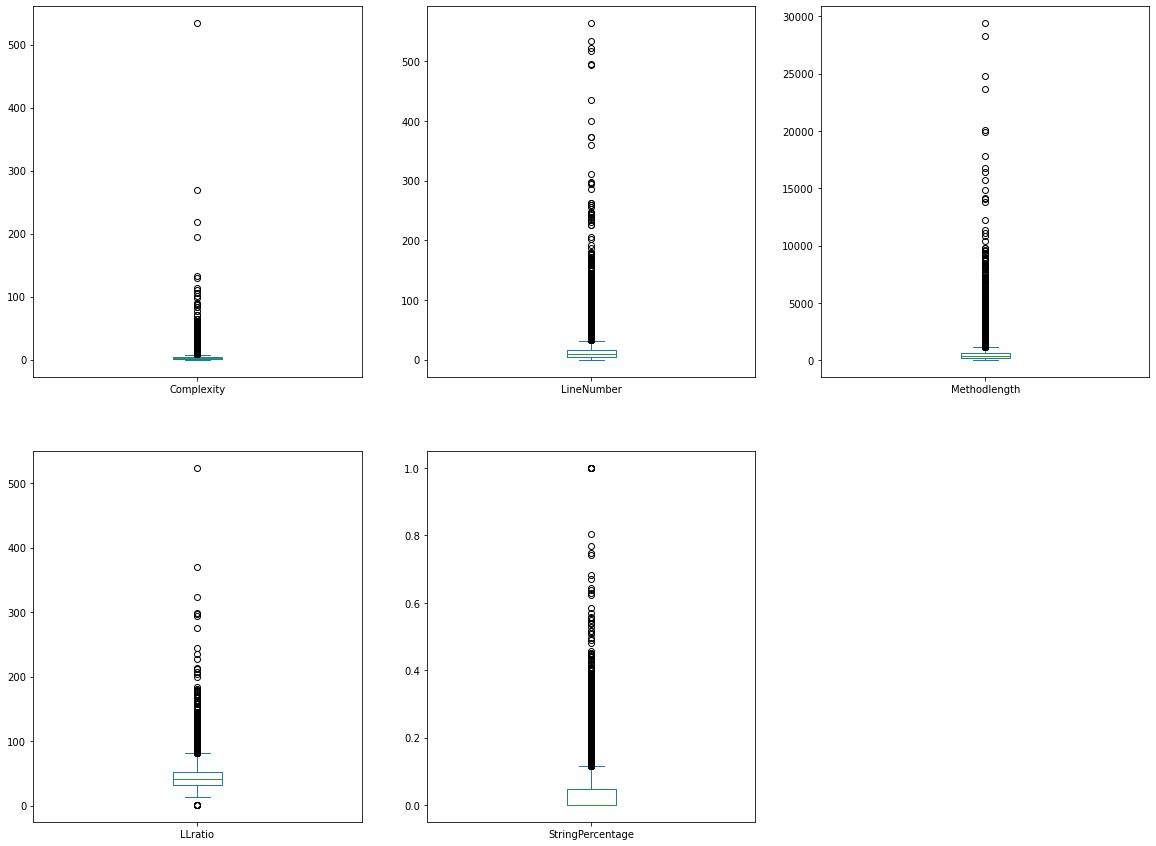

In [85]:
test.plot(kind='box',figsize=(20,15), subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

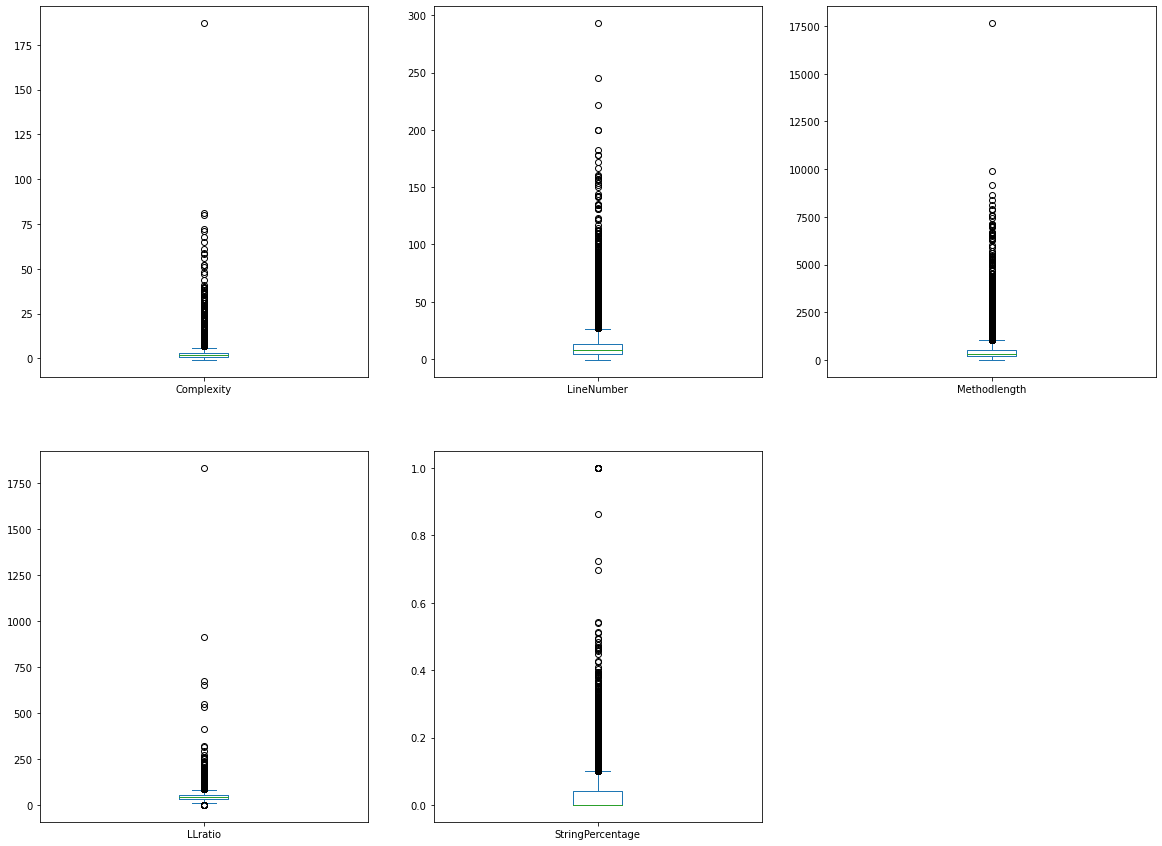

In [86]:
valuation.plot(kind='box',figsize=(20,15), subplots=True, layout=(2,3), sharex=False, sharey=False)
plt.show()

In [87]:
len(valuation[valuation["Input"].isna() ])

23

In [89]:
len(valuation)

15305

# generate training dataset

In [90]:
# Train 生成
for x in tqdm(range(0,16,1)):
    current_trainset=pd.read_csv(data_path+"java_code_trainset_"+str(x)+"_count.csv")  
    current_trainset=current_trainset.drop(['Unnamed: 0'], axis=1)
    current_trainset["Complexity"] = current_trainset["Complexity"].astype(int)
    current_trainset["LineNumber"] = current_trainset["LineNumber"].astype(int)
    current_trainset["Methodlength"] = current_trainset["Methodlength"].astype(int)
    current_trainset["LLratio"] = current_trainset["LLratio"].astype(float)
    current_trainset["StringPercentage"] = current_trainset["StringPercentage"].astype(float)
    current_trainset=current_trainset[current_trainset["Complexity"]>=0]
    current_trainset=current_trainset[current_trainset["Complexity"]<=standard_complexity]
    current_trainset=current_trainset[current_trainset["LineNumber"]<=standard_lineNumber]
    current_trainset=current_trainset[current_trainset["Methodlength"]<=standard_methodlength]
    current_trainset=current_trainset[current_trainset["LLratio"]<=standard_ratio]
    current_trainset=current_trainset[current_trainset["StringPercentage"]<=standard_sp]
    print("java_code_trainset_"+str(x)+"Length : "+ str(len(current_trainset)))
    current_trainset.to_csv("./java_code_trainset_"+str(x)+".csv")

  0%|          | 0/16 [00:00<?, ?it/s]

java_code_trainset_0Length : 22669


  6%|▋         | 1/16 [00:02<00:34,  2.33s/it]

java_code_trainset_1Length : 24217


 12%|█▎        | 2/16 [00:04<00:30,  2.18s/it]

java_code_trainset_2Length : 25280


 19%|█▉        | 3/16 [00:06<00:29,  2.28s/it]

java_code_trainset_3Length : 21384


 25%|██▌       | 4/16 [00:09<00:29,  2.45s/it]

java_code_trainset_4Length : 21026


 31%|███▏      | 5/16 [00:11<00:25,  2.34s/it]

java_code_trainset_5Length : 21300


 38%|███▊      | 6/16 [00:14<00:24,  2.48s/it]

java_code_trainset_6Length : 22353


 44%|████▍     | 7/16 [00:16<00:21,  2.40s/it]

java_code_trainset_7Length : 23179


 50%|█████     | 8/16 [00:19<00:19,  2.46s/it]

java_code_trainset_8Length : 23134


 56%|█████▋    | 9/16 [00:21<00:16,  2.32s/it]

java_code_trainset_9Length : 23147


 62%|██████▎   | 10/16 [00:23<00:13,  2.20s/it]

java_code_trainset_10Length : 22860


 69%|██████▉   | 11/16 [00:24<00:10,  2.03s/it]

java_code_trainset_11Length : 23832


 75%|███████▌  | 12/16 [00:26<00:07,  1.90s/it]

java_code_trainset_12Length : 24383


 81%|████████▏ | 13/16 [00:28<00:05,  1.80s/it]

java_code_trainset_13Length : 24437


 88%|████████▊ | 14/16 [00:29<00:03,  1.72s/it]

java_code_trainset_14Length : 24467


100%|██████████| 16/16 [00:31<00:00,  1.96s/it]

java_code_trainset_15Length : 3706


# generate test and valid dataset

In [91]:
# valid generation
current_trainset=pd.read_csv(data_path+"java_code_valset_count.csv")  
current_trainset=current_trainset.drop(['Unnamed: 0'], axis=1)
current_trainset["Complexity"] = current_trainset["Complexity"].astype(int)
current_trainset["LineNumber"] = current_trainset["LineNumber"].astype(int)
current_trainset["Methodlength"] = current_trainset["Methodlength"].astype(int)
current_trainset["LLratio"] = current_trainset["LLratio"].astype(float)
current_trainset["StringPercentage"] = current_trainset["StringPercentage"].astype(float)
current_trainset=current_trainset[current_trainset["Output"].notna()]
current_trainset=current_trainset[current_trainset["Complexity"]>=0]
current_trainset=current_trainset[current_trainset["Complexity"]<=standard_complexity]
current_trainset=current_trainset[current_trainset["LineNumber"]<=standard_lineNumber]
current_trainset=current_trainset[current_trainset["Methodlength"]<=standard_methodlength]
current_trainset=current_trainset[current_trainset["LLratio"]<=standard_ratio]
current_trainset=current_trainset[current_trainset["StringPercentage"]<=standard_sp]
current_trainset=current_trainset.reset_index(drop=True)
current_trainset.to_csv("./java_code_valset.csv")

In [92]:
# Test generation
current_trainset=pd.read_csv(data_path+"java_code_testset_count.csv")  
current_trainset=current_trainset.drop(['Unnamed: 0'], axis=1)
current_trainset["Complexity"] = current_trainset["Complexity"].astype(int)
current_trainset["LineNumber"] = current_trainset["LineNumber"].astype(int)
current_trainset["Methodlength"] = current_trainset["Methodlength"].astype(int)
current_trainset["LLratio"] = current_trainset["LLratio"].astype(float)
current_trainset["StringPercentage"] = current_trainset["StringPercentage"].astype(float)
current_trainset=current_trainset[current_trainset["Output"].notna()]
current_trainset=current_trainset[current_trainset["Complexity"]>=0]
current_trainset=current_trainset[current_trainset["Complexity"]<=standard_complexity]
current_trainset=current_trainset[current_trainset["LineNumber"]<=standard_lineNumber]
current_trainset=current_trainset[current_trainset["Methodlength"]<=standard_methodlength]
current_trainset=current_trainset[current_trainset["LLratio"]<=standard_ratio]
current_trainset=current_trainset[current_trainset["StringPercentage"]<=standard_sp]
current_trainset=current_trainset.reset_index(drop=True)
current_trainset.to_csv("./java_code_testset.csv")

# random sample valid test set -------- size=2000

In [ ]:
valuation =pd.read_csv(data_path+"java_code_valset_count.csv")  
valuation=valuation.drop(['Unnamed: 0'], axis=1)
valuation["Complexity"] = valuation["Complexity"].astype(int)
valuation["LineNumber"] = valuation["LineNumber"].astype(int)
valuation["Methodlength"] =valuation["Methodlength"].astype(int)
valuation["LLratio"] = valuation["LLratio"].astype(float)
valuation["StringPercentage"] =valuation["StringPercentage"].astype(float)
valuation=valuation[valuation["Output"].notna()]
valuation=valuation.reset_index(drop=True)
valuation .head(5)

In [280]:
smaples=pd.DataFrame()
L1 = random.sample(range(1, len(valuation)), 2000)

In [281]:
smaples=valuation.iloc[sorted(L1)]
smaples=smaples.reset_index(drop=True)
smaples.to_csv("./java_code_validset_"+str(len(smaples))+".csv")
len(L1)

2000

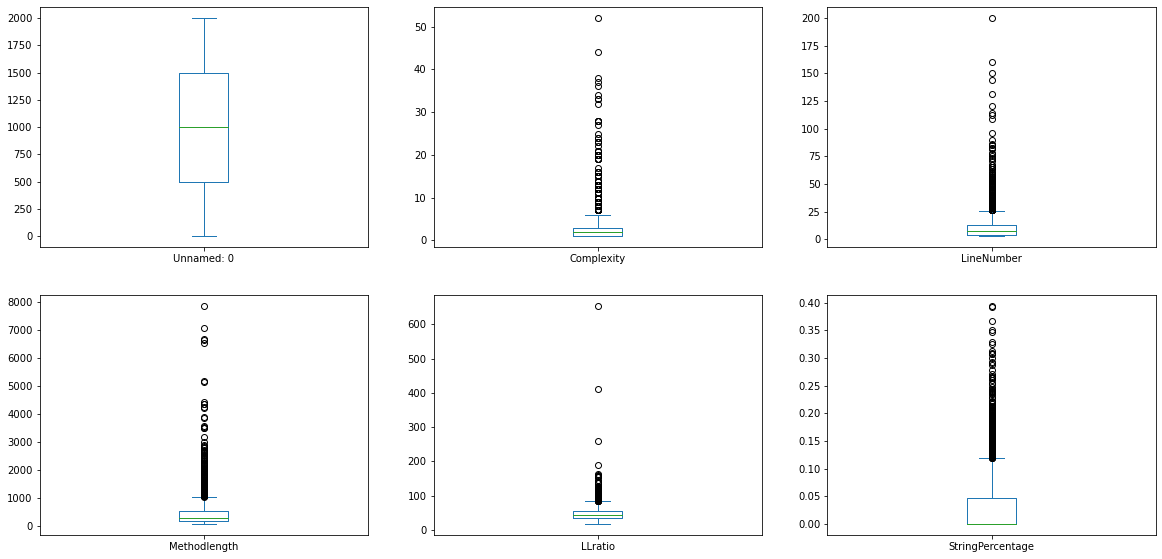

In [284]:
smaples.plot(kind='box',figsize=(20,15), subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()